In [37]:
import matplotlib

# Make editable in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.cm as cm
import matplotlib.colors as mcolors

%pylab inline
import pandas as pd

# Load data
data = pd.read_csv("structure_features_corr_all.csv")
data = data[data["allele_num"]>100].copy()
data.head()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/melissagymrek/miniconda3/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,rpt_class,pair,correlation,p_value,allele_num
0,A,exp_raw~mfold_DNA_raw,-0.045270,1.977861e-02,2650
1,AAAAAC,exp_raw~mfold_DNA_raw,0.148067,4.729647e-02,180
2,AAAAC,exp_raw~mfold_DNA_raw,-0.349240,1.251416e-12,390
3,AAAAG,exp_raw~mfold_DNA_raw,0.153942,3.908603e-02,180
4,AAAC,exp_raw~mfold_DNA_raw,-0.078457,1.058669e-07,4580


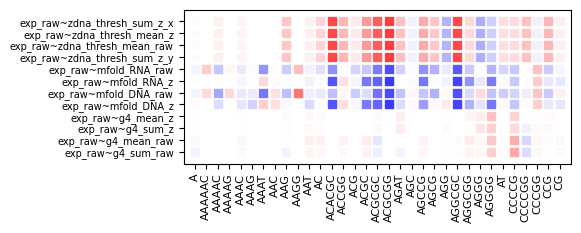

In [43]:
###### Could manually code order of rows/columns to force certain order #####
rpt_units = sorted(list(set(data["rpt_class"]))) #["A", "AC"] TODO - should we add stranded?
scorenames = ["exp_raw~g4_sum_raw", "exp_raw~g4_mean_raw", "exp_raw~g4_sum_z","exp_raw~g4_mean_z",
 "exp_raw~mfold_DNA_z", "exp_raw~mfold_DNA_raw", "exp_raw~mfold_RNA_z", "exp_raw~mfold_RNA_raw",
 "exp_raw~zdna_thresh_sum_z_y","exp_raw~zdna_thresh_mean_raw","exp_raw~zdna_thresh_mean_z","exp_raw~zdna_thresh_sum_z_x"]

###### Logic to get color #####
cmap = cm.bwr # Can change to update colormap. This is blue/white/red
norm = mcolors.Normalize(vmin=-1, vmax=1)
scalar_mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
def GetColor(score):
    return scalar_mappable.to_rgba(score)

######## Figure #########
# Set up figure
fig = plt.figure()
fig.set_size_inches((5, 2))
ax = fig.add_subplot(111)

# For each rpt unit/score combination plot a square
for i in range(len(rpt_units)):
    for j in range(len(scorenames)):
        df = data[(data["rpt_class"]==rpt_units[i]) & (data["pair"]==scorenames[j])]
        if df.shape[0] != 1:
            #print("Missing score for %s %s"%(rpt_units[i], scorenames[j]))
            score = "NA"
            color = "white" # missing color
        else:
            score = df["correlation"].values[0]
            color = GetColor(score)
        ax.scatter([i],[j], marker="s", color=color)

# Clean up axis/labels
ax.set_xticks(range(len(rpt_units)))
ax.set_xticklabels(rpt_units, rotation=90, size=8)
ax.set_yticks(range(len(scorenames)))
ax.set_yticklabels(scorenames, size=7);
ax.set_xlim(left=-1, right=len(rpt_units))
ax.set_ylim(bottom=-1, top=len(scorenames));